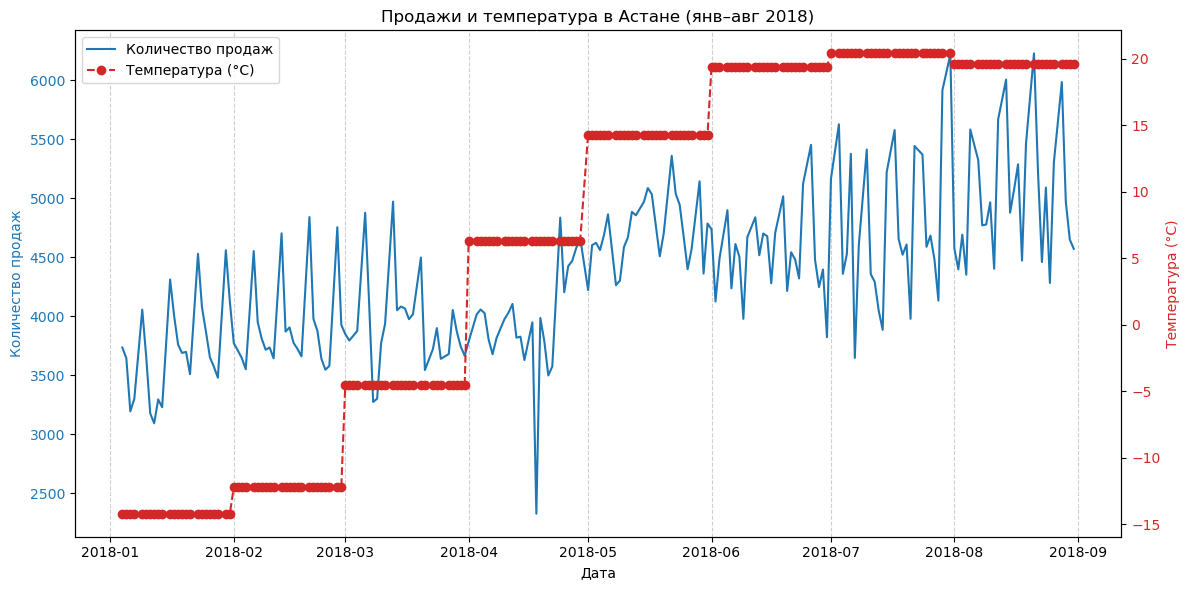

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Подготовка данных ---
df = pd.read_csv("data.csv")
df['Дата'] = pd.to_datetime(df['Дата'])

# Группируем продажи по датам
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df = grouped_df.rename(columns={'Количество': 'Количество продаж'})

# Средние месячные температуры (Астана, 2018)
monthly_avg_temp = {
    1: -14.2, 2: -12.2, 3: -4.5, 4: 6.3,
    5: 14.3, 6: 19.4, 7: 20.4, 8: 19.6
}

# Добавляем столбец температуры по месяцу
sales_temp = grouped_df.copy()
sales_temp['T'] = sales_temp['Дата'].dt.month.map(monthly_avg_temp)

# --- Визуализация с двумя осями ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Линия продаж (левая ось Y)
ax1.plot(sales_temp['Дата'], sales_temp['Количество продаж'],
         color='tab:blue', label='Количество продаж')
ax1.set_xlabel("Дата")
ax1.set_ylabel("Количество продаж", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Линия температуры (правая ось Y)
ax2 = ax1.twinx()
ax2.plot(sales_temp['Дата'], sales_temp['T'],
         color='tab:red', linestyle='--', marker='o', label='Температура (°C)')
ax2.set_ylabel("Температура (°C)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Заголовок, легенды и сетка
plt.title("Продажи и температура в Астане (янв–авг 2018)")
ax1.grid(True, axis='x', linestyle='--', alpha=0.6)
fig.tight_layout()

# Отображаем легенды отдельно для каждой оси
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()